In [1]:
import numpy as np
import random as rnd
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import time
import mpmath as mp
from mpmath import *

In [2]:
def rombint(func,  a,  b,  tol):  #trapezoid approx to integral of func in interval a,b

    MAXJ=5 
    MAXITER=30
    g=np.zeros(MAXJ+1)
        
    h=0.5*(b-a)
    gmax=h*(func(a)+func(b))  #first trapezoid approx to integral of func in interval [a,b]
    g[0]=gmax
    nint=1
    error=10**20
    i=0
    
    while not((i > MAXITER) | ((i > 5) & (abs(error) < tol))):
        
                #   Calculate next trapezoidal rule approximation to integral
        g0=0.0
        for k in range (1,nint+1):
            g0+=func((a+(k+k-1)*h))

            
        g0=0.5*g[0]+h*g0;
        h=0.5*h;
        nint*=2;
        if (i<MAXJ):
            jmax=i
        else:
            jmax=MAXJ
            
        fourj=1.;

        for j in range(jmax+1):
        # Use Richardson extrapolation. */
            
            fourj*=4.0;
            g1=g0+(g0-g[j-1])/(fourj-1.0);
            g[j-1]=g0;
            g0=g1;
            

            
        if (abs(g0) > tol): #1.e-30 
            error=1.0-gmax/g0;
            
        else:
            error=gmax; 
        gmax=g0;
        g[jmax]=g0;
        i=i+1

        
        
    if ((i > MAXITER) & (abs(error) > tol)):
        print("rombint failed to converge; integral=%g, error=%g\n",g0,error);

    return g0
        


In [3]:
def rombint2D(func, a, b, tol):#numerical integral of f(b,x)dx at [a,b]
    
    MAXJ=5; 
    MAXITER=30 
    g=np.zeros(MAXJ+1)
        
    h=0.5*(b-a);
    gmax=h*(func(a,b)+func(b,b));
    g[0]=gmax;
    nint=1;
    error=1.e20;
    i=0
    while not((i > MAXITER) | ((i > 5) & (abs(error) < tol))):
        
           #     Calculate next trapezoidal rule approximation to integral. */
        g0=0.0;
        for k in range (1,1+nint):
            g0+=func(a+(k+k-1)*h,b);

            
        g0=0.5*g[0]+h*g0;
        h=0.5*h;
        nint*=2;
        if (i<MAXJ):
            jmax=i
        else:
            jmax=MAXJ
        fourj=1.;

        for j in range (1,1+jmax):
        # Use Richardson extrapolation. */
        
            fourj*=4.0;
            g1=g0+(g0-g[j-1])/(fourj-1.0);
            g[j-1]=g0;
            g0=g1;
            

        
        if (abs(g0) > tol): #1.e-30) 
            error=1.0-gmax/g0;
            
        else :
                error=gmax; 
        gmax=g0;
        g[jmax]=g0;
        i+=1
        
        
    if ((i > MAXITER) & (abs(error) > tol)):
        printf("rombint failed to converge; integral=%g, error=%g\n",g0,error);

    return g0;
        

In [4]:


def rand_gauss (mu,sigma):
 
    U1 = -1 + (rnd.random()) * 2;
    U2 = -1 + (rnd.random()) * 2;
    W = U1** 2 + U2** 2;
    
    while ((W >= 1) | (W == 0)):
        U1 = -1 + (rnd.random()) * 2;
        U2 = -1 + (rnd.random()) * 2;
        W = pow (U1, 2) + pow (U2, 2);
 
    mult = np.sqrt ((-2 * np.log(W)) / W);
    X1 = U1 * mult;
    X2 = U2 * mult;
 
    
 
    return mu + sigma * X1


--- 11.747929811477661 seconds ---


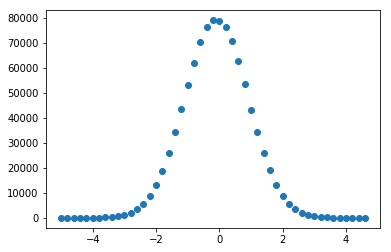

In [5]:
start_time = time.time()
aaa=np.zeros(1000000);    #test of rand_gauss with a histogram
for i in range (1000000):
    aaa[i]=rand_gauss(0,1);
    
np.histogram(aaa,50,(-5,5))[1]
plt.scatter(np.histogram(aaa,50,(-5,5))[1][0:49],np.histogram(aaa,50,(-5,5))[0][0:49])
print("--- %s seconds ---" % (time.time() - start_time))

--- 4.295994758605957 seconds ---


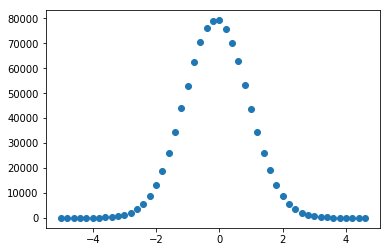

In [6]:
start_time = time.time()
aaa=np.zeros(1000000);    #test of numpy random.normal with a histogram///This works faster
for i in range (1000000):
    aaa[i]=np.random.normal(0,1);
    
np.histogram(aaa,50,(-5,5))[1]
plt.scatter(np.histogram(aaa,50,(-5,5))[1][0:49],np.histogram(aaa,50,(-5,5))[0][0:49])
print("--- %s seconds ---" % (time.time() - start_time))

In [7]:
N_CST_Store=10000   #number of steps
def omegaDyn(a):#finds omega_lambda*a^4

    i=int(a*N_CST_Store)
    return omegav_CST_Store[i] * pow(a, 4);

In [8]:
#public variables

pi = 3.14159265
h0 = 70.74; #hubble constant
tcmb = 2.7254  #cmb temperature
omegac = 0.2589;#cold dark matter energy density at present time
omegab = 0.0486;# baryon energy density now: 8\pi*G*\rho_m^{(0)}/(3H0^2)
omegak = 0.0;#curvature of FRW
global omegav
omegav = 0.6925; #dark energy ratio to critical density now: \rho_lambda/H0^2
omegan = 0.0;#neutrino energy density 
ndyn = 0;

rhocr = 2.7754e11 * 1.989e30 * pow(h0/100.0,2);    #critical density in kg/(Mpc)^3
alpha = 0.002  #the coefficient behind the normal random variable that is stochastically creating lambda


toler=1.0e-4

In [9]:
grhom = (3.3379e-11) * h0 * h0;   #this is 3H0^2/c^2 in Mpc^-2                              
grhog = (1.4952e-13) * pow(tcmb, 4); #this is 8pi.G/(c^2) *(4sigma_B*T_present^4/c)/c^2 in Mpc^-2                     
grhor = (3.3957e-14) * pow(tcmb, 4); # 7/8*(4/11)^(4/3)*grhog (per neutrino species) 

In [10]:
def CSTdtauda(a):#returns 1/(a^2H)=1/(a.da\dt)=d\eta/da
    grho2 = grhom* (omegac + omegab) * a + grhog + grhom * omegaDyn(a);#this is RHS of 3a^4H^2 using Friedmann eq:
        #3a^4H^2=3a^4H0^2* (H/H0)^2=3H0^2\Omega_m^{(0)}a+3H0^2\Omega_r^{(0)}+3H0^2\Omega_L a^4
    if (grho2<0):
        print('Warning!!! Negative H^2 encountered')    
    dtauda1 = np.sqrt(3.0 / grho2); #this is 1/(a^2H)

    return (dtauda1);
def CSTdtimeda(a): # returns dt/da

    return a * CSTdtauda(a)

    

In [11]:
N_CST_Store=10000   #number of steps    !!!Take care before running this. it resets al histories!!!!!!!!

a_CST_Store=np.zeros(N_CST_Store+1)  
for i in range (0,N_CST_Store+1):
    a_CST_Store[i] = i/10000.0;   #set equal steps for the scale factor
tau_CST_Store=np.zeros(N_CST_Store+1)-999999999.9    # Set everything initially to -infty
tau_CST_Store[0] = 0.0;
time_CST_Store=np.zeros(N_CST_Store+1)
omegav_CST_Store=np.zeros(N_CST_Store+1)

In [29]:

def CSTCalctau(a): #wants to calculate \eta(a)

    i = np.int(np.round(a*N_CST_Store));#without round, there is some weird problem with the way python applies int
    #for example, python says int((9/10000-1/10000)*N_CST_Store)=7, because it evaluates it as 7.999999 and not 8. ://
    if (a > 1.0):
        i = N_CST_Store;
    if (a < 1.0e-8):   #our minimum resolution to big bang
        return 0;
    if( i < 0 ):
        tau_CST_Store[0] = 0.0; 
        return 0.0;
    
    if( tau_CST_Store[i] < 0.0 ): #negative tau means that it is the default -999...9 value, so it's not been overwritten
        if( tau_CST_Store[i-1] < 0 ): #if the previous tau hasn't been overwritten,too, then first overwrite the previous one
            FAST_CSTCalctau( a - 1.0/N_CST_Store );
        #tau_CST_Store[i] = tau_CST_Store[i-1] + rombint(CSTdtauda,a_CST_Store[i-1],a_CST_Store[i],toler); #using written integral calculator
        tau_CST_Store[i] = tau_CST_Store[i-1] + integrate.quad(CSTdtauda,a_CST_Store[i-1],a_CST_Store[i])[0]; #using package for integral
      
    if (i==0):
        i=1    #if i=0, then i-1 would bring the 10000th element of tau_CST_Store. so instead let's put i=1.
    #return tau_CST_Store[i-1] + rombint(CSTdtauda, a_CST_Store[i-1], a, toler);
    return tau_CST_Store[i-1] + integrate.quad(CSTdtauda, a_CST_Store[i-1], a)[0];

def FAST_CSTCalctau(a): #wants to calculate \eta(a), this doesn't return anything. only is here to rewrite tau_CST_Store

    i = round(a*N_CST_Store);
    if (a > 1.0):
        i = N_CST_Store;
    if (a < 1.0e-8):   #our minimum resolution to big bang
        return 0;
    if( i < 0 ):
        tau_CST_Store[0] = 0.0; 
        return 0.0;
    
    if( tau_CST_Store[i] < 0.0 ): #negative tau means that it is the default -999...9 value, so it's not been overwritten
        if( tau_CST_Store[i-1] < 0 ): #if the previous tau hasn't been overwritten,too, then first overwrite the previous one
            FAST_CSTCalctau( a - 1.0/N_CST_Store );
        #tau_CST_Store[i] = tau_CST_Store[i-1] + rombint(CSTdtauda,a_CST_Store[i-1],a_CST_Store[i],toler);
        tau_CST_Store[i] = tau_CST_Store[i-1] + integrate.quad(CSTdtauda,a_CST_Store[i-1],a_CST_Store[i])[0];
        

In [30]:
#def g(a,b): #the integrand used for calculating dV/da
#      return CSTdtimeda(b)*pow(b,3)*pow((CSTCalctau(a) - CSTCalctau(b)),2)


#def CSTCalcVolume(a):  #going to calculate dV/da
    
#    dVda = (4*pi)*CSTdtauda(a)*rombint2D(g,0.0,a,1.0e-8);   
#    return dVda

def CSTCalcVolume(a,b):  #going to calculate dV. 
    dV=(4*pi/3)*pow(a,4) * pow(CSTCalctau(b) - CSTCalctau(a),3) * CSTdtauda(a)#if integrated on [0,b], with da, gives V(b)
    return dV

In [65]:
def main():

    zeta = 1.0
    presenttime=1.0;
    c2oG = 4.1553e+49;  
    global omegav
    omegav = 0.0;    #I take the initial lambda value to be zero
    
    aold = 1.0e-8;
    taurmtestold = 0.0;
    dVoldaold = 0.0;
    Volold = 0.0;
    S=0.0;  
    Sold = 0.0;
    aold = 0.0; 
    timeold = 0.0;
    temp_aold = 1.0e-8;
    
    a_CST_Store[0] = 1.0e-8;
    tau_CST_Store[0] = 0.0;

    for i in range (0,N_CST_Store+1):
        a =float( i/N_CST_Store);
        #time_CST_Store[i] = timeold + rombint(CSTdtimeda,aold,a,toler);
        time_CST_Store[i] = timeold + integrate.quad(CSTdtimeda,aold,a)[0];

        #Vol = rombint2D(CSTCalcVolume, 0.0, a, toler); #lower limit can be set 1.0e-8
        b=a
        #Vol = integrate.quad(CSTCalcVolume, 0.0, a, args=(b))[0];
        N=int(b*N_CST_Store)
        Vol=0.0
        for j in range (N):
            Vol+=integrate.quad(CSTCalcVolume, j/(N_CST_Store), (j+1)/(N_CST_Store), args=(b))[0]
            #quad code goes wrong when there are lots of small bumps in a large interval. so i divided the interval to smaller segments
        #print(Vol)
        #zeta = rand_gauss(0,1);
        zeta=np.random.normal(0,1)
        S = (Sold + alpha * zeta * np.sqrt(Vol - Volold));
        if (Vol<=0.0): #to avoid infinity at first step
            rho=0
        else:
            rho = S/Vol;
            # This rho is in (Mpc^-2)
            # We need to multiply it with c^2/G to convert it to kg . Mpc^-3
            # Mpc = 3.085678e22 m
            # c^2/G = ( c^2 / G ) 3.085678e22 = 4.1553e+49 kg/Mpc

        rho = rho * c2oG;

        omegav = rho/rhocr;    #If its commented then it will give LCDM.
        omegav_CST_Store[i]=omegav

        Volold = Vol;
        Sold = S;
        aold = a;
        timeold = time_CST_Store[i];
        #the rest is for tracking the code during a run
        print(a)
        if (i>0):
            H[i]=(a_CST_Store[i]-a_CST_Store[i-1])/(time_CST_Store[i]-time_CST_Store[i-1])/a_CST_Store[i]
            OMEGA_L[i]=omegav_CST_Store[i]*(grhom/(3*H[i]**2))
        if(i/10-int(i/10)<=0.0):
            plt.scatter(time_CST_Store[0:i],OMEGA_L[0:i],s=2)
            plt.show()



In [70]:
H=np.zeros(N_CST_Store+1)#hubble constant
OMEGA_L=np.zeros(N_CST_Store+1)#ratio of \rho_L to H^2
H[0]=0
#for i in range (0,N_CST_Store):
#    H[i]=(a_CST_Store[i+1]-a_CST_Store[i])/(time_CST_Store[i+1]-time_CST_Store[i])/a_CST_Store[i]
#    OMEGA_L[i]=omegav_CST_Store[i]*(grhom/(3*H[i]**2))

In [71]:
N_CST_Store=10000   #number of steps    !!!Take care before running this. it resets al histories!!!!!!!!

a_CST_Store=np.zeros(N_CST_Store+1)  
for i in range (0,N_CST_Store+1):
    a_CST_Store[i] = i/10000.0;   #set equal steps for the scale factor
tau_CST_Store=np.zeros(N_CST_Store+1)-999999999.9    # Set everything initially to -infty
tau_CST_Store[0] = 0.0;
time_CST_Store=np.zeros(N_CST_Store+1)
omegav_CST_Store=np.zeros(N_CST_Store+1)

0.0


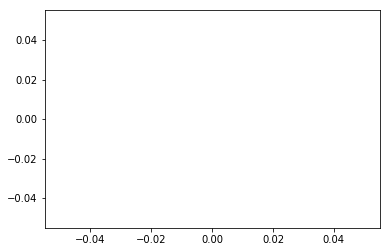

0.0001
0.0002
0.0003
0.0004
0.0005
0.0006
0.0007
0.0008
0.0009
0.001


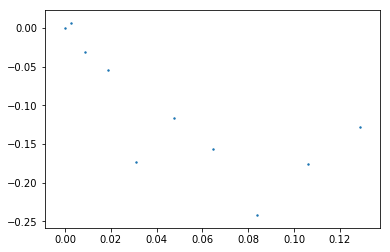

0.0011
0.0012
0.0013
0.0014
0.0015
0.0016
0.0017
0.0018
0.0019
0.002


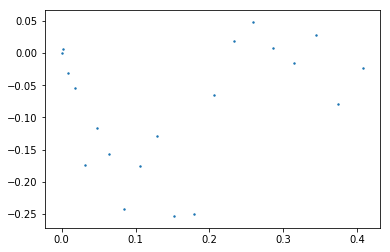

0.0021
0.0022
0.0023
0.0024
0.0025
0.0026
0.0027
0.0028
0.0029
0.003


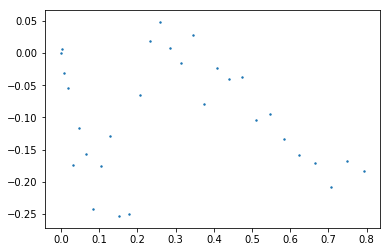

0.0031
0.0032
0.0033
0.0034
0.0035
0.0036
0.0037
0.0038
0.0039
0.004


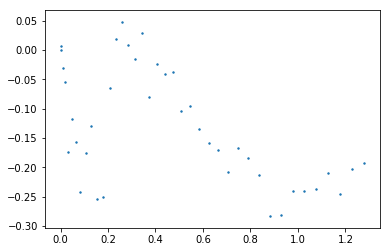

0.0041
0.0042
0.0043
0.0044
0.0045
0.0046
0.0047
0.0048
0.0049
0.005


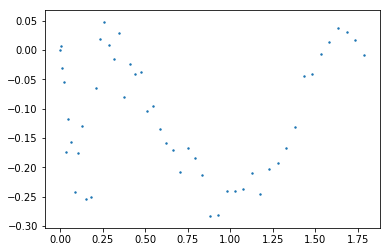

0.0051
0.0052
0.0053
0.0054
0.0055
0.0056
0.0057
0.0058
0.0059
0.006


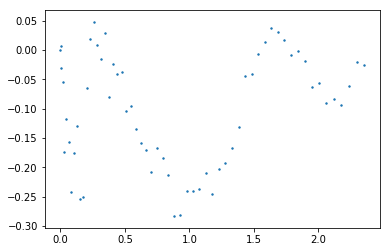

0.0061
0.0062
0.0063
0.0064
0.0065
0.0066
0.0067
0.0068
0.0069
0.007


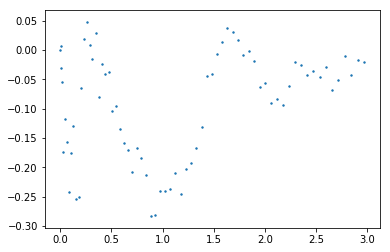

0.0071
0.0072
0.0073
0.0074
0.0075
0.0076
0.0077
0.0078
0.0079
0.008


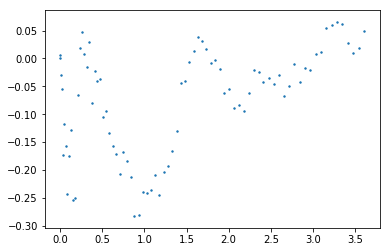

0.0081
0.0082
0.0083
0.0084
0.0085
0.0086
0.0087
0.0088
0.0089
0.009


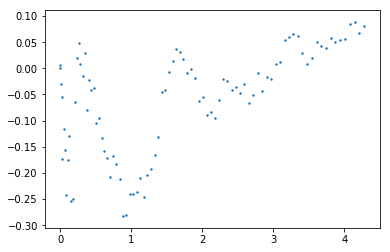

0.0091
0.0092
0.0093
0.0094
0.0095
0.0096
0.0097
0.0098
0.0099
0.01


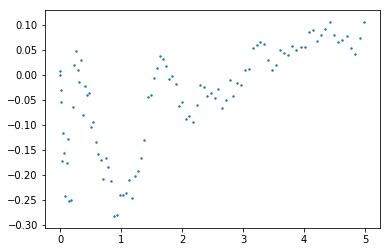

0.0101
0.0102
0.0103
0.0104
0.0105
0.0106
0.0107
0.0108
0.0109
0.011


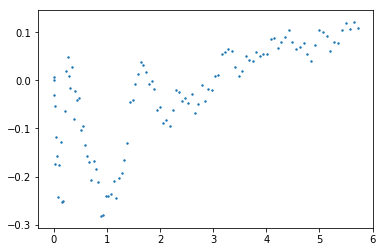

0.0111
0.0112
0.0113
0.0114
0.0115
0.0116
0.0117
0.0118
0.0119
0.012


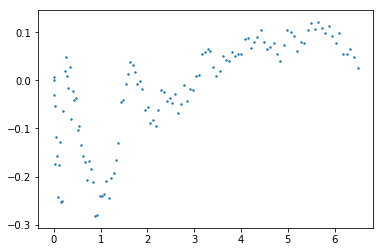

0.0121
0.0122
0.0123
0.0124
0.0125
0.0126
0.0127
0.0128
0.0129
0.013


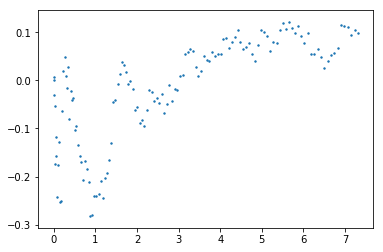

0.0131
0.0132
0.0133
0.0134
0.0135
0.0136
0.0137
0.0138
0.0139
0.014


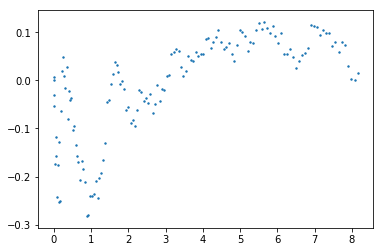

0.0141
0.0142
0.0143
0.0144
0.0145
0.0146
0.0147
0.0148
0.0149
0.015


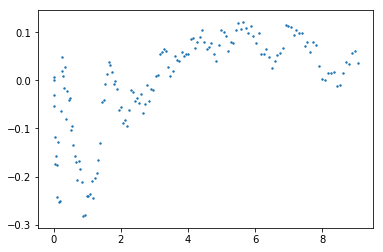

0.0151
0.0152
0.0153
0.0154
0.0155
0.0156
0.0157
0.0158
0.0159
0.016


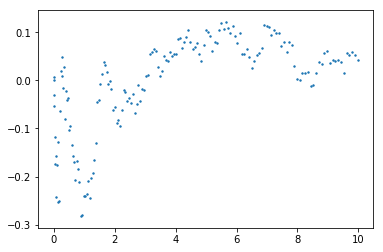

0.0161
0.0162
0.0163
0.0164
0.0165
0.0166
0.0167
0.0168
0.0169
0.017


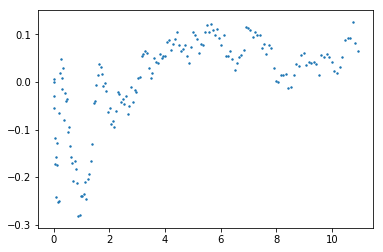

0.0171
0.0172
0.0173
0.0174
0.0175
0.0176
0.0177
0.0178
0.0179
0.018


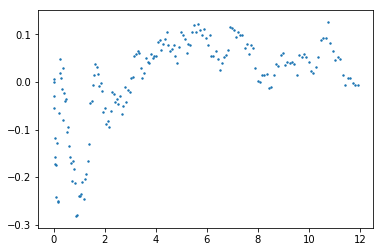

0.0181
0.0182
0.0183
0.0184
0.0185
0.0186
0.0187
0.0188
0.0189
0.019


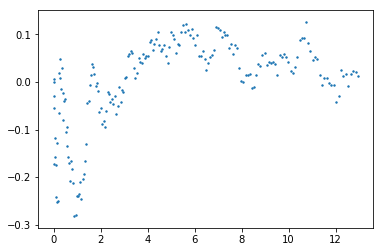

0.0191
0.0192
0.0193
0.0194
0.0195
0.0196
0.0197
0.0198
0.0199
0.02


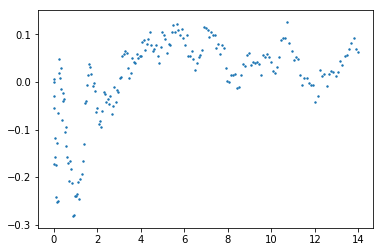

0.0201
0.0202
0.0203
0.0204
0.0205
0.0206
0.0207
0.0208
0.0209
0.021


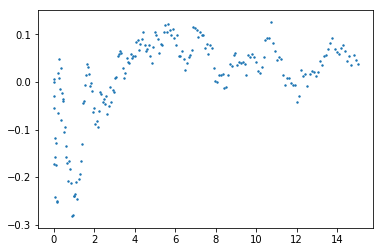

0.0211
0.0212
0.0213
0.0214
0.0215
0.0216
0.0217
0.0218
0.0219
0.022


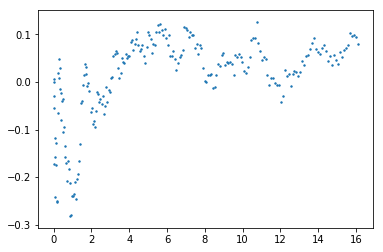

0.0221
0.0222
0.0223
0.0224
0.0225
0.0226
0.0227
0.0228
0.0229
0.023


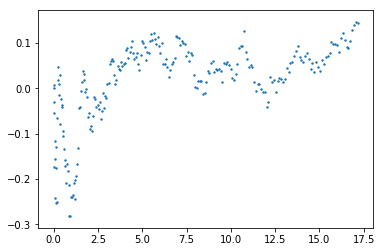

0.0231
0.0232
0.0233
0.0234
0.0235
0.0236
0.0237
0.0238
0.0239
0.024


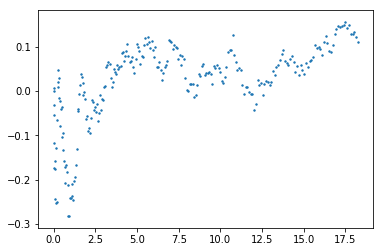

0.0241
0.0242
0.0243
0.0244
0.0245
0.0246
0.0247
0.0248
0.0249
0.025


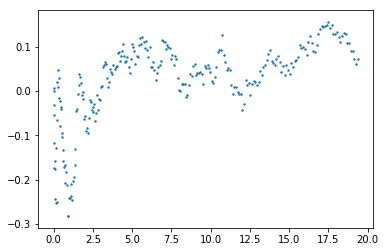

0.0251
0.0252
0.0253
0.0254
0.0255
0.0256
0.0257
0.0258
0.0259
0.026


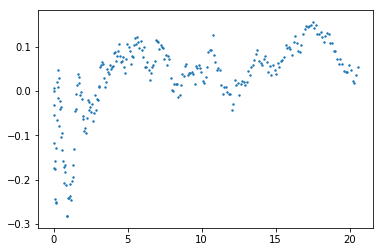

0.0261
0.0262
0.0263
0.0264
0.0265
0.0266
0.0267
0.0268
0.0269
0.027


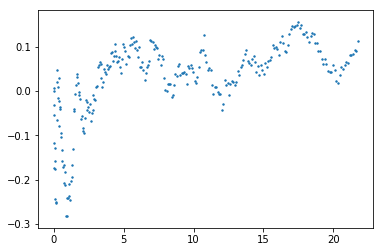

0.0271
0.0272
0.0273
0.0274
0.0275
0.0276
0.0277
0.0278
0.0279
0.028


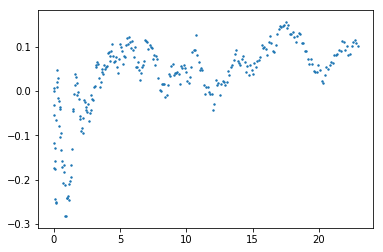

0.0281
0.0282


KeyboardInterrupt: 

In [72]:
main()

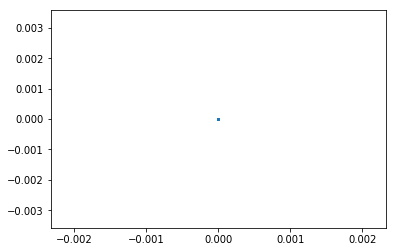

In [69]:
#plt.scatter(time_CST_Store[1000:5000],omegav_CST_Store[1000:5000])
plt.scatter(time_CST_Store[100:10000],OMEGA_L[100:10000],s=2)

In [543]:
print (OMEGA_L[7145])
print (time_CST_Store[7146])

0.07554105525826661
3151.319772065965


In [638]:
CSTCalctau(10/10000)

322.9959236835811

In [649]:
CSTCalcVolume(0.000078965014,14/10000)

0.0038576258940154757

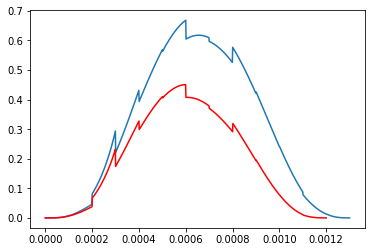

In [43]:
b=13/10000
xx = np.linspace(0.0, b, 1000)
yy=np.zeros(1000)
for i in range (1000):
    yy[i]=CSTCalcVolume(xx[i],b)
plt.plot(xx,yy)

b=12/10000
xx = np.linspace(0.0, b, 1000)
yy=np.zeros(1000)
for i in range (1000):
    yy[i]=CSTCalcVolume(xx[i],b)
plt.plot(xx,yy,'r')
plt.show()



In [621]:
def gg(x):
    return np.exp(-x)
rombint(gg,0,100,1.0e-5)-(1-np.exp(-100))

-3.5532025117746002e-06

In [707]:
f = lambda x, y: cos(x+y/2)
quad(f, [-pi/2, pi/2], [0, pi])

mpf('4.0')

In [737]:
y_temp

array([0.00000000e+00, 4.14293061e-10, 6.56224667e-09, 3.28898184e-08,
       1.02915074e-07, 2.48771141e-07, 5.10768419e-07, 9.36975140e-07,
       1.58281542e-06, 2.51068400e-06, 3.78957687e-06, 5.49473713e-06,
       7.70731530e-06, 1.05140435e-05, 1.40069228e-05, 1.82829234e-05,
       2.34436964e-05, 2.95952981e-05, 3.68479239e-05, 4.53156544e-05,
       5.51162102e-05, 6.63707173e-05, 7.92034815e-05, 9.37417715e-05,
       1.10115611e-04, 1.28457578e-04, 1.48902613e-04, 1.71587836e-04,
       1.96652365e-04, 2.24237150e-04, 2.54484804e-04, 2.87539451e-04,
       3.23546571e-04, 3.62652855e-04, 4.05006064e-04, 4.50754899e-04,
       5.00048866e-04, 5.53038154e-04, 6.09873518e-04, 6.70706160e-04,
       7.35687620e-04, 8.04969673e-04, 8.78704223e-04, 9.57043207e-04,
       1.04013850e-03, 1.12814183e-03, 1.22120467e-03, 1.31947820e-03,
       1.42311316e-03, 1.53225985e-03, 1.64706798e-03, 1.76768667e-03,
       1.89426433e-03, 2.02694860e-03, 2.16588632e-03, 2.31122345e-03,
      

In [45]:
start_time = time.time()
b=13/10000
print(rombint2D(CSTCalcVolume, 0.0, b, 1.0e-4))
print("--- %s seconds ---" % (time.time() - start_time))

0.00038467717265784385
--- 1.5634188652038574 seconds ---


In [734]:
f_temp(7/10000)

mpf('0.5459645939283656')

In [55]:
start_time = time.time()
b=13/N_CST_Store
N=int(b*N_CST_Store)
I=0.0
for i in range (N):
    I+=integrate.quad(CSTCalcVolume, i/(N_CST_Store), (i+1)/(N_CST_Store), args=(b))[0]
print(I)
print("--- %s seconds ---" % (time.time() - start_time))

0.00038466846075338955
--- 0.7707359790802002 seconds ---


In [32]:
start_time = time.time()
N=100
b=1300/10000
f_temp=lambda a: CSTCalcVolume(a,b)
x_temp = np.linspace(0.0,b,N)
y_temp = np.linspace(0.0,b,N)
for i in range (N):
    y_temp[i]=f_temp(x_temp[i])
print(np.trapz(y_temp, x_temp))
print("--- %s seconds ---" % (time.time() - start_time))

552934724.034107
--- 0.08107209205627441 seconds ---


In [761]:
x_temp[N-1]

0.0013

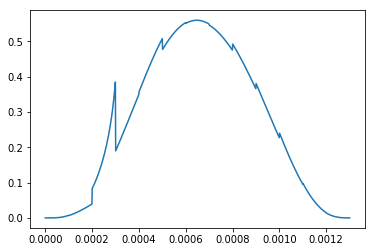

In [762]:
plt.plot(x_temp,y_temp)
plt.show()

In [582]:
b=7146/10000
integrate.quad(CSTCalcVolume, 0.0, b, args=(b))[0]

4.666977301664136

In [576]:
b=7147/10000
integrate.quad(CSTCalcVolume, 0.0, b, args=(b))[0]

nan

In [437]:
def integrand(a, x, b):
    return a*x**2 + b

aa = 2
bb = 1
II = integrate.quad(integrand, 0, 1, args=(aa,bb))
II

(3.0, 3.3306690738754696e-14)

In [513]:
8/2/3

1.3333333333333333